<a href="https://colab.research.google.com/github/hellomstars/Kaggle_HeartAttack/blob/main/my_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep', font_scale=2.5)

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
filename = '/content/drive/My Drive/Heart_Attack/heart.csv'
data = pd.read_csv(filename)
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
data.count()

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler() #표준화로 scaling

In [16]:
# creating a copy of data
df = data

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)

# defining the features and target
X = df.drop(['output'],axis=1)
y = df[['output']]

# scaling the continuous featuree
X[con_cols] = ss.fit_transform(X[con_cols])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


In [22]:
# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [50]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
# same as : print("SVM Score: {:.2f}%".format(clf.score(X_test, y_test)*100))
print("SVM Score: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

SVM Score: 86.89%


In [42]:
coeff_df = pd.DataFrame(data.columns.delete(13))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(clf.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
10,slp,1.000000
12,thall,0.992862
11,caa,0.314756
3,trtbps,0.208382
0,age,0.132945
2,cp,-0.007949
1,sex,-0.263452
4,chol,-0.401053
6,restecg,-0.586662
5,fbs,-0.650730


In [40]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("Logistric Regression Score: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Logistric Regression Score: 90.16%


In [31]:
coeff_df = pd.DataFrame(data.columns.delete(13))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
12,thall,1.314440
10,slp,0.471555
11,caa,0.464910
3,trtbps,0.327030
0,age,0.076371
2,cp,-0.094284
1,sex,-0.284631
4,chol,-0.602792
6,restecg,-0.846531
9,oldpeak,-1.062478


In [43]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2) # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{}-NN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

2-NN Score: 85.25%


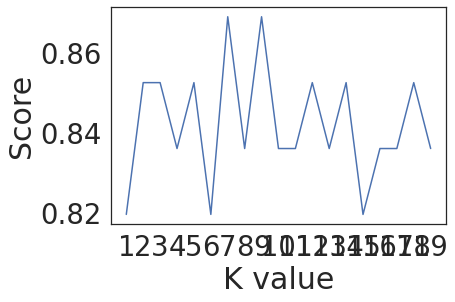

Maximum KNN Score is 86.89%


In [34]:
# try to find best k value
scoreList = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors = i) # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))

plt.plot(range(1, 20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))

In [51]:
#Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(X_test, y_test)*100))

Accuracy of Naive Bayes: 65.57%
